In [2]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)

After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipykernel_4774/2538665923.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_4774/2538665923.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [3]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


In [5]:
import pandas as pd


# LOAD DATA

df = pd.read_csv('/home/andra/Downloads/Titanicdataset/Titanic-Dataset.csv')
print("Data Awal:\n", df.head())
print("\nInfo:\n")
print(df.info())


# EXERCISE 1: Identifying and Handling Missing Data


print("\n=== Missing Values Sebelum Cleaning ===")
print(df.isnull().sum())

# Contoh kolom yang biasanya missing: Age, Cabin, Embarked

# Isi Age dengan nilai rata-rata
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Isi Embarked dengan modus (nilai yang paling sering muncul)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Karena Cabin hampir semuanya kosong, kita drop saja
df.drop(columns=['Cabin'], inplace=True)

# Drop baris yang Name-nya hilang (meskipun jarang)
df.dropna(subset=['Name'], inplace=True)

print("\n=== Setelah Menangani Missing Data ===")
print(df.isnull().sum())


# EXERCISE 2: Standardizing Categorical Data


# Kolom kategori di Titanic: Sex, Embarked

# Standarisasi 'Sex' → kapital huruf pertama (Male, Female)
df['Sex'] = df['Sex'].str.capitalize()

# Standarisasi 'Embarked' → uppercase (C, Q, S)
df['Embarked'] = df['Embarked'].str.upper()

print("\n=== Setelah Standarisasi Kategori ===")
print(df[['Sex', 'Embarked']].head())


# EXERCISE 3: Filtering and Deduplication


# Hapus duplikasi baris
df.drop_duplicates(inplace=True)

# Contoh filter → hanya penumpang usia > 18 (dewasa)
df_adults = df[df['Age'] > 18]

print("\n=== Contoh Filter Dewasa (>18) ===")
print(df_adults.head())


# EXERCISE 4: Data Transformation & Normalization


# Normalisasi Fare (0–1)
df['Fare_norm'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

print("\n=== Contoh Normalisasi Fare ===")
print(df[['Fare', 'Fare_norm']].head())


# EXERCISE 5: Outlier Detection


# Kita cek outlier pada Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outlier
df['Fare_outlier'] = (df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)

print("\n=== Outlier Fare (True = Outlier) ===")
print(df[['Fare', 'Fare_outlier']].head())


# SAVE RESULT

df.to_csv('/home/andra/Downloads/titanic_cleaned.csv', index=False)
print("\nDataset cleaned berhasil disimpan!")


Data Awal:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

/tmp/ipykernel_4774/463624947.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_4774/463624947.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [6]:
df['Fare_outlier'].sum()


np.int64(116)

<Figure size 1000x600 with 0 Axes>

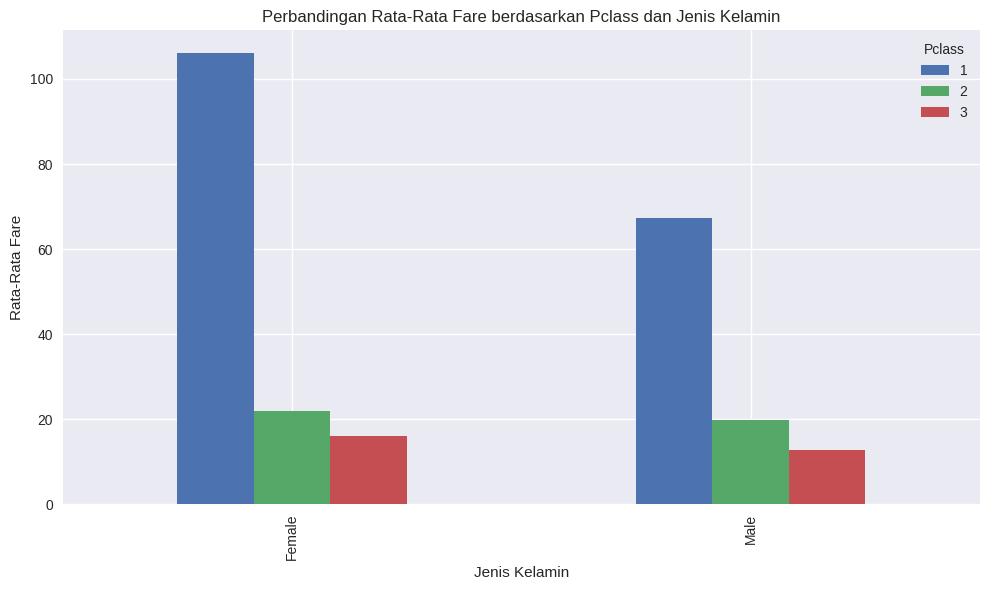

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib style
plt.style.use('seaborn-v0_8')

# Hitung rata-rata Fare per grup
group_data = df.groupby(['Sex', 'Pclass'])['Fare'].mean().unstack()

# Plot Multi-Bar
plt.figure(figsize=(10,6))
group_data.plot(kind='bar', figsize=(10,6))

plt.title('Perbandingan Rata-Rata Fare berdasarkan Pclass dan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-Rata Fare')
plt.legend(title='Pclass')
plt.tight_layout()
plt.show()


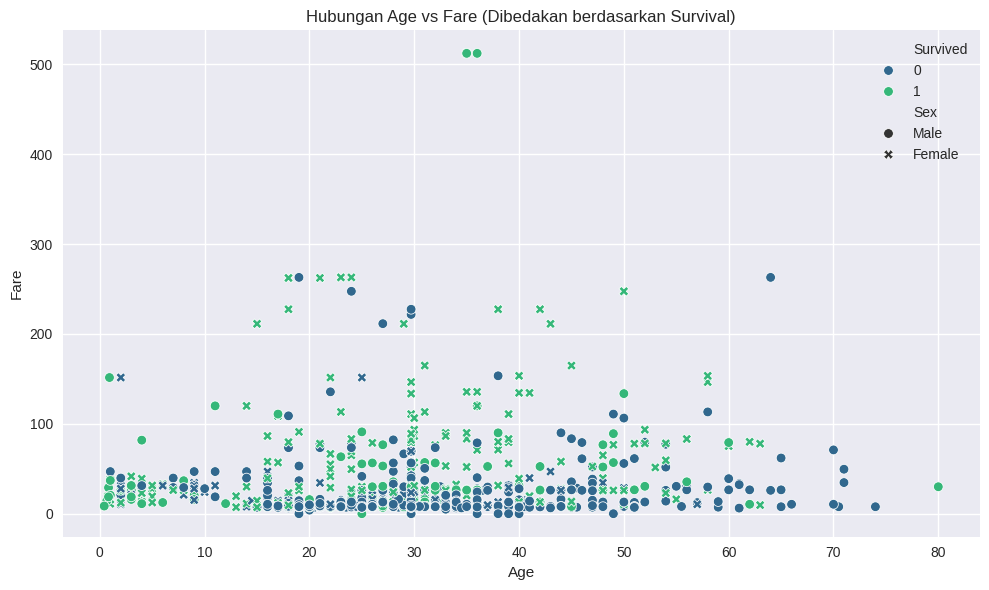

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Fare',
    hue='Survived',
    style='Sex',
    palette='viridis'
)

plt.title('Hubungan Age vs Fare (Dibedakan berdasarkan Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()


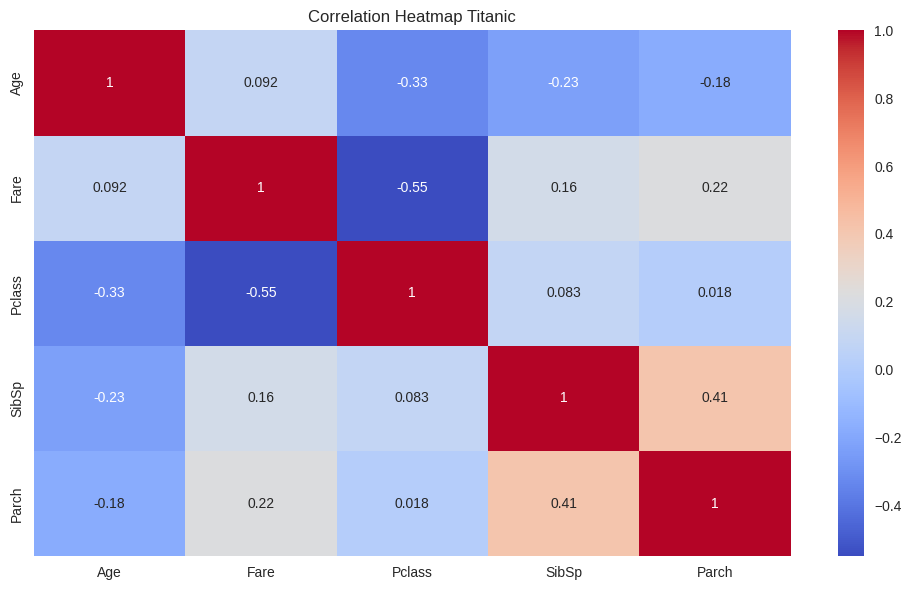

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Titanic')
plt.tight_layout()
plt.show()


/tmp/ipykernel_4774/1898398696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')


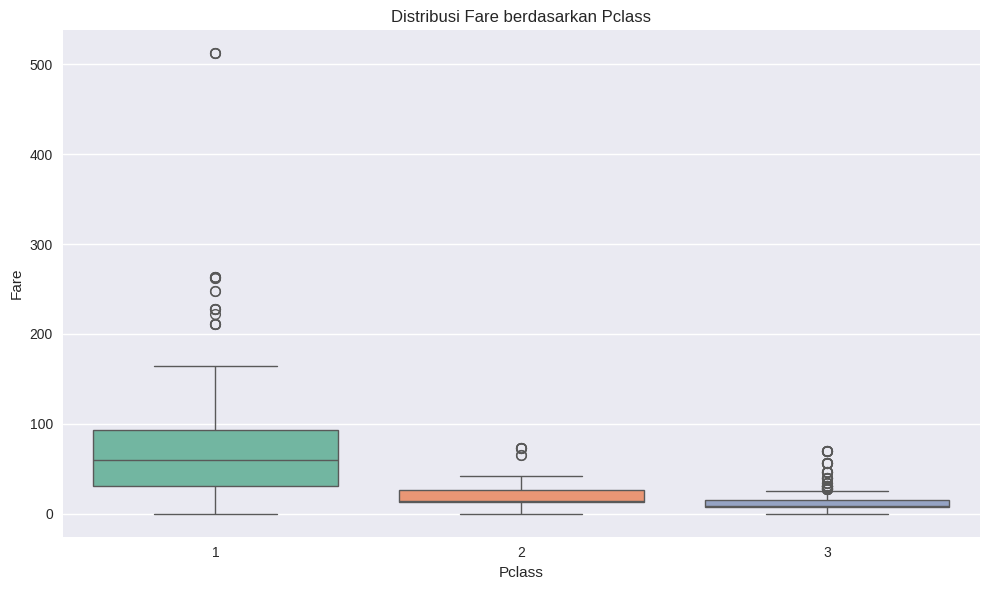

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')

plt.title('Distribusi Fare berdasarkan Pclass')
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ==========================
# 1. LOAD DATA
# ==========================
df = pd.read_csv('/home/andra/Downloads/Airbnb/AB_NYC_2019.csv')

print("===== BEFORE CLEANING =====")
print(df.head())
print(df.info())
print(df.isnull().sum())



===== BEFORE CLEANING =====
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149           

In [28]:
import pandas as pd
import numpy as np

# ============================
# 1. LOAD DATA
# ============================
df = pd.read_csv("/home/andra/Downloads/Airbnb/AB_NYC_2019.csv")

print("=== BEFORE CLEANING ===")
print(df.head())
print(df.info())

# ============================================================
# 2. HANDLE MISSING VALUES
# ============================================================

# 2.1 Hapus baris yang kolom name-nya kosong
df = df[df['name'].notna()]

# 2.2 Isi reviews_per_month yang kosong dengan 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 2.3 Isi last_review kosong dengan tanggal default (misal None → NaT)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# ============================================================
# 3. CLEANING & TYPE CONVERSION
# ============================================================

# Pastikan latitude/longitude float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Pastikan price, minimum_nights, etc., integer
numeric_cols = [
    'price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365'
]

for col in numeric_cols:
    df[col] = df[col].astype('Int64')

# ============================================================
# 4. REMOVE DUPLICATES
# ============================================================
df.drop_duplicates(inplace=True)

# ============================================================
# 5. OUTLIER DETECTION USING IQR
# ============================================================

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

df['price_outlier'] = detect_outliers_iqr(df['price'])
df['minimum_nights_outlier'] = detect_outliers_iqr(df['minimum_nights'])

# ============================================================
# 6. NORMALIZATION (MIN-MAX)
# ============================================================

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['price_norm', 'minimum_nights_norm']] = scaler.fit_transform(
    df[['price', 'minimum_nights']]
)

# ============================================================
# 7. SAVE CLEANED DATA
# ============================================================
save_path = "/home/andra/Downloads/Airbnb/NYC_Airbnb_cleaned.csv"
df.to_csv(save_path, index=False)

print("\n=== CLEANING DONE ===")
print("Saved to:", save_path)
print(df.head())


=== BEFORE CLEANING ===
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               

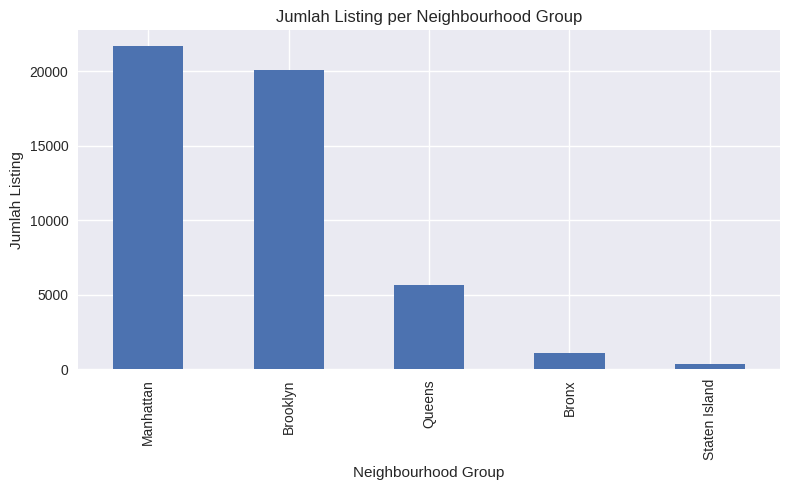

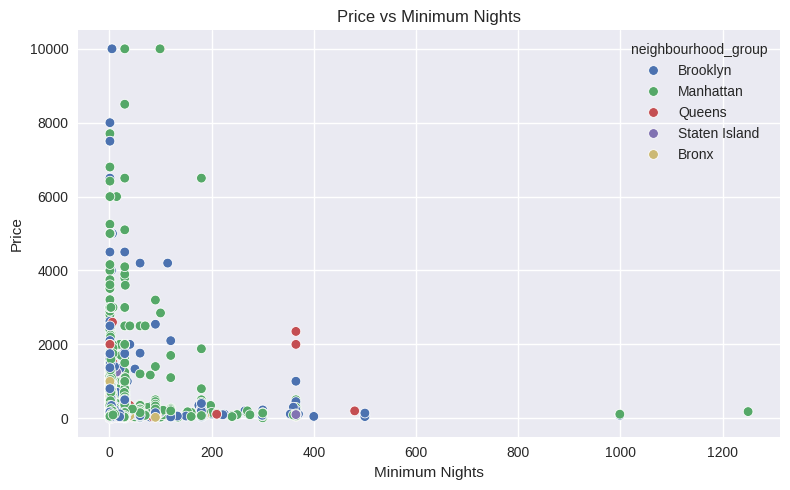

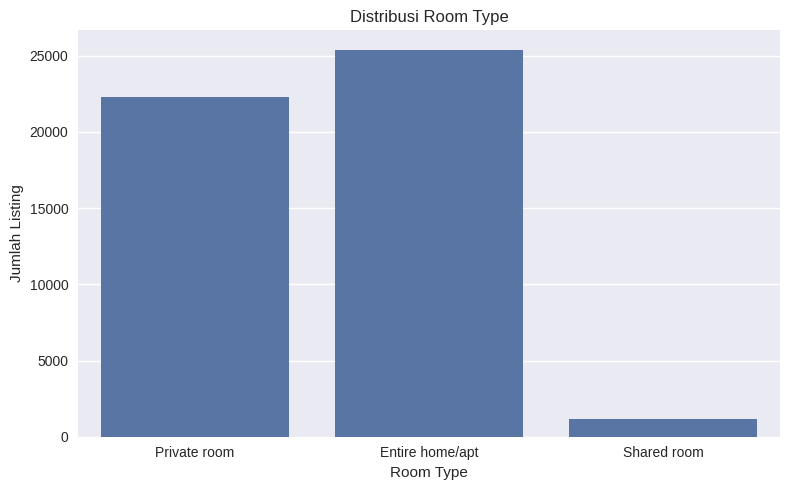

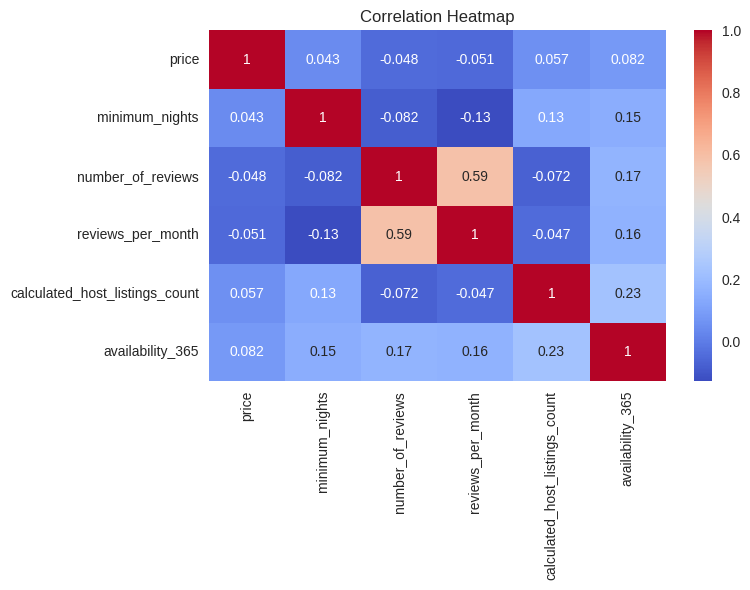

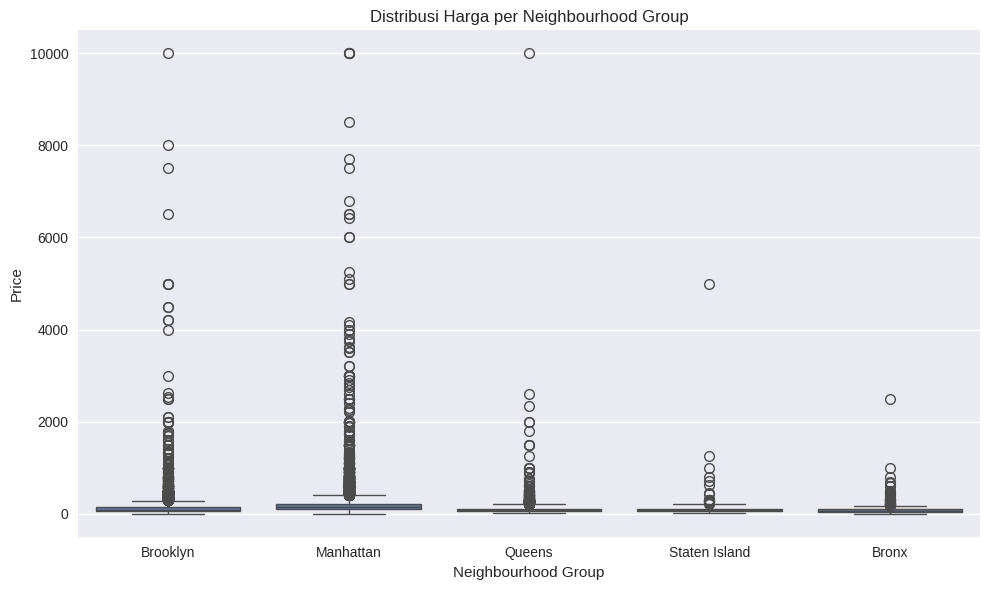

In [32]:
# ===============================
#   DASHBOARD VISUALISASI AIRBNB NYC
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

# ---------- 1. Distribusi Listing per Neighbourhood Group ----------
plt.figure(figsize=(8,5))
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('Jumlah Listing per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Jumlah Listing')
plt.tight_layout()
plt.show()


# ---------- 2. Scatter Price vs Minimum Nights ----------
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='minimum_nights',
    y='price',
    hue='neighbourhood_group'
)
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


# ---------- 3. Distribusi Tipe Kamar ----------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type')
plt.title('Distribusi Room Type')
plt.xlabel('Room Type')
plt.ylabel('Jumlah Listing')
plt.tight_layout()
plt.show()


# ---------- 4. Heatmap Korelasi ----------
plt.figure(figsize=(8,6))
numerical_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# ---------- 5. Boxplot Harga per Neighbourhood ----------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Distribusi Harga per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
